In [2]:
import numpy as np
import pylab as pl

from vent.common.loggers import DataLogger

2020-06-12 10:36:20,869 - vent.common.prefs - INFO - Loaded prefs from /Users/ms81/vent/prefs.json
2020-06-12 10:36:20,872 - vent.common.prefs - INFO - Saved prefs to /Users/ms81/vent/prefs.json


In [3]:
dl = DataLogger()                # Get an instance of the data logger, to load compressed hdf5 files

def plot_data(filename):
    """
    Small helper function to translate hdf-file into a plottable list
    """
    dff = dl.load_file(filename) # dff is a dictionary. One can just extract waveform and control data

    ls_wv = dff['waveform_data']
    ls_ct = dff['control_data']
    data = np.zeros((len(ls_wv),2))
    for idx in range(len(ls_wv)):
        data[idx,0] = ls_wv[idx][4]  # time
        data[idx,1] = ls_wv[idx][3]  # pressure
    return data

In [5]:
# Running on the dinky, PEEP=8 with PEEPvalve, PIP=25 with PID
datav = plot_data("./example_logfile/2020-06-08-11-11_controller_log.0.h5")

# Running on the dinkey, PEEP=8 with PID, PIP=25 with PID
datas = plot_data("./example_logfile/2020-06-08-11-01_controller_log.0.h5")

# Running on the dinkey, PEEP=8 with PEEPVALVE, PIP = 35 with PID
datam = plot_data("./example_logfile/2020-06-08-11-17_controller_log.0.h5")

Reading... ./example_logfile/2020-06-08-11-11_controller_log.0.h5
Reading... ./example_logfile/2020-06-08-11-01_controller_log.0.h5
Reading... ./example_logfile/2020-06-08-11-17_controller_log.0.h5


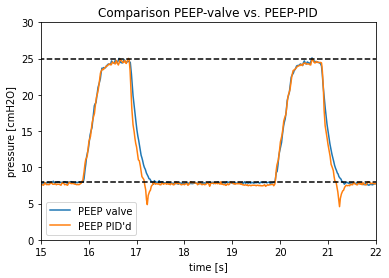

In [6]:
pl.plot(datav[:,0] - np.min(datav[:,0]), datav[:,1], label = "PEEP valve")
pl.plot(datas[:,0] - np.min(datas[:,0]), datas[:,1], label = "PEEP PID'd")

pl.plot([0,40],[8,8],'k--')
pl.plot([0,40],[25,25],'k--')
pl.xlim([15,22])
pl.ylim([0,30])
pl.legend()
pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]")
pl.title("Comparison PEEP-valve vs. PEEP-PID");

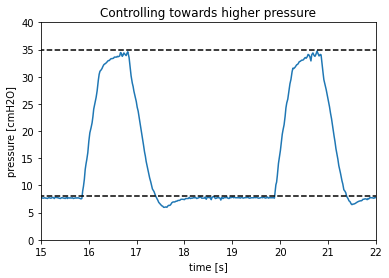

In [7]:
pl.plot(datam[:,0] - np.min(datam[:,0]), datam[:,1])

pl.plot([0,40],[8,8],'k--')
pl.plot([0,40],[35,35],'k--')
pl.xlim([15,22])
pl.ylim([0,40])
pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]");
pl.title("Controlling towards higher pressure");

In [14]:
filename = "../../2020-06-08-16-47_controller_log.0.h5"

data_pressure = plot_data(filename)

dff = dl.load_file(filename)

ls_wv = dff['waveform_data']
ls_ct = dff['control_data']
data = np.zeros((len(ls_wv),2))
for idx in range(len(ls_wv)):
    data[idx,0] = ls_wv[idx][4]  # time
    data[idx,1] = ls_wv[idx][1]  # pressure
        

Reading... ../../2020-06-08-16-47_controller_log.0.h5
Reading... ../../2020-06-08-16-47_controller_log.0.h5


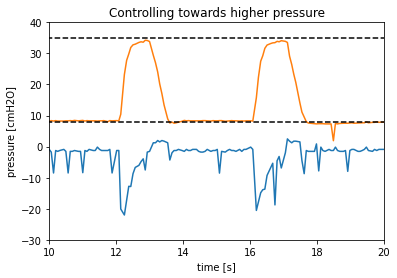

In [16]:
pl.plot(data[:,0] - np.min(data[:,0]), data[:,1]/5)
pl.plot(data_pressure[:,0] - np.min(data_pressure[:,0]), data_pressure[:,1])

pl.plot([0,40],[8,8],'k--')
pl.plot([0,40],[35,35],'k--')
pl.xlim([10,20])
pl.ylim([-30,40])
pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]");
pl.title("Controlling towards higher pressure");

(10.0, 15.0)

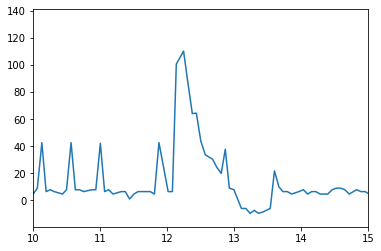

In [63]:
pl.plot(data[:,0] - np.min(data[:,0]), -data[:,1])
pl.xlim([10,15])

(7.0, 10.0)

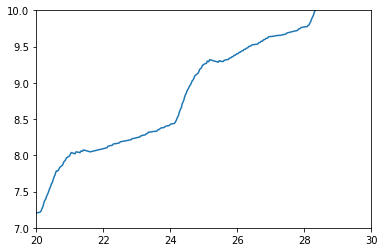

In [51]:
pl.plot(data[0:-1,0] - np.min(data[:,0]), -np.cumsum(np.diff(data[:,0] - np.min(data[:,0])) * data[0:-1,1]/60))
# pl.plot(datam[:,0] - np.min(datam[:,0]), datam[:,1])

pl.xlim([20,30])
pl.ylim([7,10])

In [ ]:
# New runs

In [17]:
filename = "../../2020-06-11-16-05_controller_log.0.h5"

data_pressure = plot_data(filename)

dff = dl.load_file(filename)

ls_wv = dff['waveform_data']
ls_ct = dff['control_data']
data = np.zeros((len(ls_wv),2))
for idx in range(len(ls_wv)):
    data[idx,0] = ls_wv[idx][4]  # time
    data[idx,1] = ls_wv[idx][1]  # pressure
        

Reading... ../../2020-06-11-16-05_controller_log.0.h5
Reading... ../../2020-06-11-16-05_controller_log.0.h5


In [18]:
dff

{'waveform_data': array([( 0, 0.        , 0.        ,  1.5490072 , 1.59190595e+09),
        ( 0, 0.        , 0.        , -0.7709636 , 1.59190595e+09),
        ( 0, 4.32299213, 0.        , -0.63035931, 1.59190595e+09), ...,
        (10, 6.16773406, 4.32299213, -0.34915073, 1.59190599e+09),
        (10, 7.57585811, 4.32299213, -0.41945288, 1.59190599e+09),
        (10, 8.76049705, 4.32299213, -0.70066146, 1.59190599e+09)],
       dtype=[('cycle_number', '<u4'), ('flow_in', '<f8'), ('flow_out', '<f8'), ('pressure', '<f8'), ('timestamp', '<f8')]),
 'control_data': array([(nan, nan, b'ValueName.PEEP', 1.59190595e+09,  8. ),
        (nan, nan, b'ValueName.PIP', 1.59190595e+09, 20. ),
        (nan, nan, b'ValueName.PIP_TI', 1.59190595e+09,  0.4), ...,
        (nan, nan, b'ValueName.PIP_TI', 1.59190599e+09,  0.4),
        (nan, nan, b'ValueName.BREATH', 1.59190599e+09, 15. ),
        (nan, nan, b'ValueName.INSPIR', 1.59190599e+09,  1. )],
       dtype=[('max_value', '<f8'), ('min_value', '<f8'

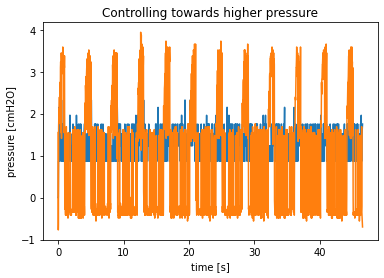

In [19]:
pl.plot(data[:,0] - np.min(data[:,0]), data[:,1]/5)
pl.plot(data_pressure[:,0] - np.min(data_pressure[:,0]), data_pressure[:,1])

# pl.plot([0,40],[8,8],'k--')
# pl.plot([0,40],[20,20],'k--')
# pl.xlim([0,20])
# pl.ylim([-1,5])
pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]");
pl.title("Controlling towards higher pressure");